#**CHALLENGE TELECOM X PARTE 2**

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import textwrap

In [132]:
datos = pd.read_csv('/content/datos_tratados.csv')

In [133]:
datos.head()

,customerID,evasion_empresa,sexo,mayor_65,pareja,dependientes,meses_contrato,tipo_contrato,factura_online,forma_pago,...,proveedor_internet,seguridad_online,respaldo_online,seguridad_dispositivo,soporte_tecnico,suscripcion_TV,suscripcion_peliculas,suscripcion_telefono,multiples_lineas,cuenta_diaria
0,0002-ORFBO,No,Female,mayor,Yes,Yes,9,One year,Yes,Mailed check,...,DSL,No,Yes,No,Yes,Yes,No,Yes,No,2.186667
1,0003-MKNFE,No,Male,mayor,No,No,9,Month-to-month,No,Mailed check,...,DSL,No,No,No,No,No,Yes,Yes,Yes,1.996667
2,0004-TLHLJ,Yes,Male,mayor,No,No,4,Month-to-month,Yes,Electronic check,...,Fiber optic,No,No,Yes,No,No,No,Yes,No,2.463333
3,0011-IGKFF,Yes,Male,menor,Yes,No,13,Month-to-month,Yes,Electronic check,...,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,No,3.266667
4,0013-EXCHZ,Yes,Female,menor,Yes,No,3,Month-to-month,Yes,Mailed check,...,Fiber optic,No,No,No,Yes,Yes,No,Yes,No,2.796667


In [134]:
datos.columns

Index(['customerID', 'evasion_empresa', 'sexo', 'mayor_65', 'pareja',
       'dependientes', 'meses_contrato', 'tipo_contrato', 'factura_online',
       'forma_pago', 'cuenta_mensual', 'Total', 'proveedor_internet',
       'seguridad_online', 'respaldo_online', 'seguridad_dispositivo',
       'soporte_tecnico', 'suscripcion_TV', 'suscripcion_peliculas',
       'suscripcion_telefono', 'multiples_lineas', 'cuenta_diaria'],
      dtype='object')

In [135]:
#cambiando orden de columnas:
nuevo_orden = ['customerID', 'evasion_empresa', 'sexo', 'mayor_65', 'pareja',
       'dependientes', 'meses_contrato', 'suscripcion_telefono', 'multiples_lineas','proveedor_internet',
       'seguridad_online', 'respaldo_online', 'seguridad_dispositivo',
       'soporte_tecnico', 'suscripcion_TV', 'suscripcion_peliculas',
       'tipo_contrato', 'factura_online',
       'forma_pago', 'cuenta_mensual', 'Total','cuenta_diaria']
datos = datos[nuevo_orden]
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customerID             7043 non-null   object 
 1   evasion_empresa        7043 non-null   object 
 2   sexo                   7043 non-null   object 
 3   mayor_65               7043 non-null   object 
 4   pareja                 7043 non-null   object 
 5   dependientes           7043 non-null   object 
 6   meses_contrato         7043 non-null   int64  
 7   suscripcion_telefono   7043 non-null   object 
 8   multiples_lineas       7043 non-null   object 
 9   proveedor_internet     7043 non-null   object 
 10  seguridad_online       7043 non-null   object 
 11  respaldo_online        7043 non-null   object 
 12  seguridad_dispositivo  7043 non-null   object 
 13  soporte_tecnico        7043 non-null   object 
 14  suscripcion_TV         7043 non-null   object 
 15  susc

In [136]:
#cambiando identificadores a variables categoricas:
columnas_a_cambiar = ['evasion_empresa', 'pareja', 'dependientes',
                      'suscripcion_telefono', 'multiples_lineas',
                      'seguridad_online', 'respaldo_online', 'seguridad_dispositivo',
                      'soporte_tecnico', 'suscripcion_TV', 'suscripcion_peliculas',
                      'factura_online']

#usar replace
datos[columnas_a_cambiar] = datos[columnas_a_cambiar].replace({'Yes': 1, 'No': 0, 'No internet service':0, 'No phone service':0})
datos.head()

/tmp/ipython-input-2286398494.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos[columnas_a_cambiar] = datos[columnas_a_cambiar].replace({'Yes': 1, 'No': 0, 'No internet service':0, 'No phone service':0})


,customerID,evasion_empresa,sexo,mayor_65,pareja,dependientes,meses_contrato,suscripcion_telefono,multiples_lineas,proveedor_internet,...,seguridad_dispositivo,soporte_tecnico,suscripcion_TV,suscripcion_peliculas,tipo_contrato,factura_online,forma_pago,cuenta_mensual,Total,cuenta_diaria
0,0002-ORFBO,0,Female,mayor,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,mayor,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,mayor,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,menor,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,menor,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [137]:
datos['mayor_65'] = datos['mayor_65'].replace({'menor': 1, 'mayor': 0})
datos.head()

/tmp/ipython-input-2095048373.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos['mayor_65'] = datos['mayor_65'].replace({'menor': 1, 'mayor': 0})


,customerID,evasion_empresa,sexo,mayor_65,pareja,dependientes,meses_contrato,suscripcion_telefono,multiples_lineas,proveedor_internet,...,seguridad_dispositivo,soporte_tecnico,suscripcion_TV,suscripcion_peliculas,tipo_contrato,factura_online,forma_pago,cuenta_mensual,Total,cuenta_diaria
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [138]:
columnas_a_entero = ['mayor_65', 'multiples_lineas', 'respaldo_online', 'seguridad_dispositivo',
                     'soporte_tecnico', 'suscripcion_TV', 'suscripcion_peliculas']
datos[columnas_a_entero] = datos[columnas_a_entero].astype(np.int64)

In [139]:
datos.describe()

,evasion_empresa,mayor_65,pareja,dependientes,meses_contrato,suscripcion_telefono,multiples_lineas,seguridad_online,respaldo_online,seguridad_dispositivo,soporte_tecnico,suscripcion_TV,suscripcion_peliculas,factura_online,cuenta_mensual,Total,cuenta_diaria
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2279.734304,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.794470,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [140]:
#veremos nuestras variables categóricas
datos.describe(include='O') # letra O mayuscula me va a dar las estadisticas de las variables categóricas

,customerID,sexo,proveedor_internet,tipo_contrato,forma_pago
count,7043,7043,7043,7043,7043
unique,7043,2,3,3,4
top,9995-HOTOH,Male,Fiber optic,Month-to-month,Electronic check
freq,1,3555,3096,3875,2365


In [141]:
datos.drop(columns=['customerID'], inplace=True)
datos.head()


,evasion_empresa,sexo,mayor_65,pareja,dependientes,meses_contrato,suscripcion_telefono,multiples_lineas,proveedor_internet,seguridad_online,...,seguridad_dispositivo,soporte_tecnico,suscripcion_TV,suscripcion_peliculas,tipo_contrato,factura_online,forma_pago,cuenta_mensual,Total,cuenta_diaria
0,0,Female,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0,Male,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1,Male,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1,Male,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1,Female,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


##**Análisis Gráficos de Variables Categóricas y Numéricas**

###**Evasion-Abandono de empresa**

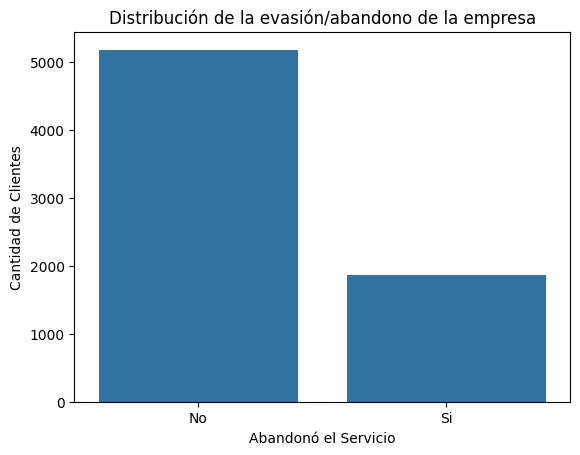

In [142]:
sns.countplot(data=datos, x='evasion_empresa')
plt.title('Distribución de la evasión/abandono de la empresa')
plt.xticks([0,1],['No','Si'])
plt.xlabel('Abandonó el Servicio')
plt.ylabel('Cantidad de Clientes')
plt.show()

La variable dependiente es Churn

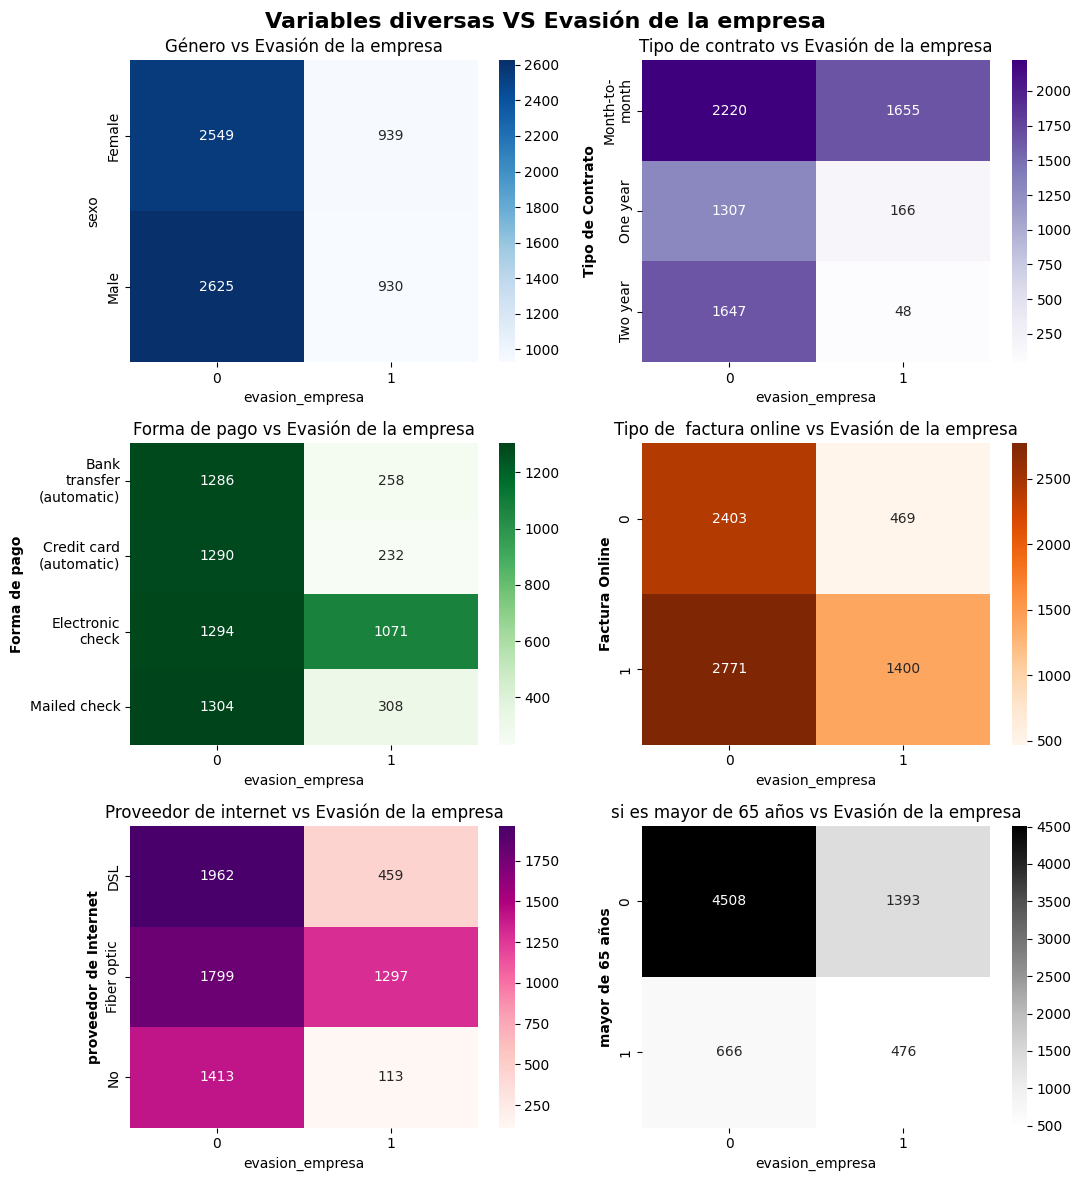

In [143]:
#Gráfico de variables categoricas vs evasión de clientes
fig, axs = plt.subplots(3, 2, figsize=(11, 12))
fig.subplots_adjust(hspace = 0.5, wspace = 0.4)
axs = axs.flatten()
fig.suptitle('Variables diversas VS Evasión de la empresa',fontweight='bold', fontsize = 16)

tabla = pd.crosstab(datos['sexo'], datos['evasion_empresa'])
sns.heatmap(tabla, annot=True, cmap='Blues', fmt='d', ax=axs[0])
axs[0].set_title("Género vs Evasión de la empresa")

tabla2 = pd.crosstab(datos['tipo_contrato'], datos['evasion_empresa'])
tabla2.index = ['\n'.join(textwrap.wrap(label, width=12)) for label in tabla2.index]
sns.heatmap(tabla2, annot=True, cmap='Purples', fmt='d', ax=axs[1])
axs[1].set_title("Tipo de contrato vs Evasión de la empresa")
axs[1].set_ylabel('Tipo de Contrato', fontweight='bold')

tabla3 = pd.crosstab(datos['forma_pago'], datos['evasion_empresa'])
tabla3.index = ['\n'.join(textwrap.wrap(label, width=12)) for label in tabla3.index]
sns.heatmap(tabla3, annot=True, cmap='Greens', fmt='d', ax=axs[2])
axs[2].set_title("Forma de pago vs Evasión de la empresa")
axs[2].set_ylabel('Forma de pago', fontweight='bold')

tabla4 = pd.crosstab(datos['factura_online'], datos['evasion_empresa'])
sns.heatmap(tabla4, annot=True, cmap='Oranges', fmt='d', ax=axs[3])
axs[3].set_title("Tipo de  factura online vs Evasión de la empresa")
axs[3].set_ylabel('Factura Online', fontweight='bold')

tabla5 = pd.crosstab(datos['proveedor_internet'], datos['evasion_empresa'])
tabla5.index = ['\n'.join(textwrap.wrap(label, width=12)) for label in tabla5.index]
sns.heatmap(tabla5, annot=True, cmap='RdPu', fmt='d', ax=axs[4])
axs[4].set_title("Proveedor de internet vs Evasión de la empresa")
axs[4].set_ylabel('proveedor de Internet', fontweight='bold')

tabla6 = pd.crosstab(datos['mayor_65'], datos['evasion_empresa'])
#tabla6.index = ['\n'.join(textwrap.wrap(label, width=12)) for label in tabla6.index]
sns.heatmap(tabla6, annot=True, cmap='Greys', fmt='d', ax=axs[5])
axs[5].set_title("si es mayor de 65 años vs Evasión de la empresa")
axs[5].set_ylabel('mayor de 65 años', fontweight='bold')


plt.tight_layout()
plt.show()


###**Abandono si es mayor de 65 Años**

In [144]:
datos.groupby('mayor_65')['evasion_empresa'].value_counts()

mayor_65  evasion_empresa
0         0                  4508
          1                  1393
1         0                   666
          1                   476
Name: count, dtype: int64

El abandono en los mayores de 65 años no es muy relevante, sin embargo, creando soluciones que se ajusten a sus necesidades se puede retener a un cliente que no es muy tecnológico

###**Abandono si el cliente tiene pareja**

In [145]:
datos.groupby('pareja')['evasion_empresa'].value_counts()

pareja  evasion_empresa
0       0                  2441
        1                  1200
1       0                  2733
        1                   669
Name: count, dtype: int64

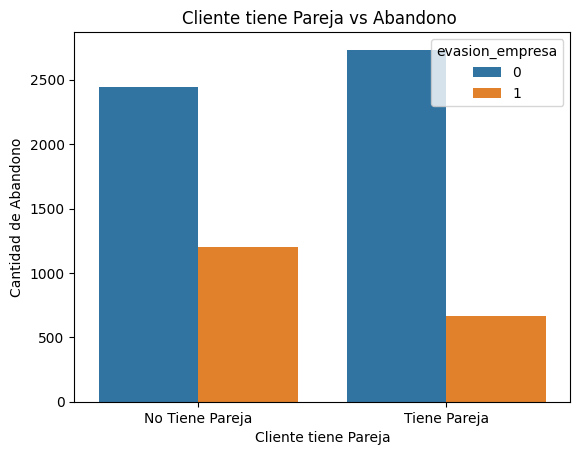

In [146]:
sns.countplot(x='pareja', data=datos,hue='evasion_empresa')
plt.title('Cliente tiene Pareja vs Abandono ')
plt.xlabel('Cliente tiene Pareja')
plt.xticks([0,1],['No Tiene Pareja','Tiene Pareja'])
plt.ylabel('Cantidad de Abandono')
plt.show()

Los clientes que no tienen pareja, tiene más abandono, talvez si conocieramos los rangos de edades de los clientes con pareja, se podría saber si debe a que tienen otras actividades como el deporte o bien si tienen una edad más avanzada, tal vez, los productos y servicios de la empresa no son los adecuados para ellos

###**Abandono por Meses de contrato**

In [147]:
datos.groupby('meses_contrato')['evasion_empresa'].value_counts(normalize=True)

meses_contrato  evasion_empresa
0               0                  1.000000
1               1                  0.619902
                0                  0.380098
2               1                  0.516807
                0                  0.483193
                                     ...   
70              1                  0.092437
71              0                  0.964706
                1                  0.035294
72              0                  0.983425
                1                  0.016575
Name: proportion, Length: 145, dtype: float64

<Axes: xlabel='meses_contrato', ylabel='Count'>

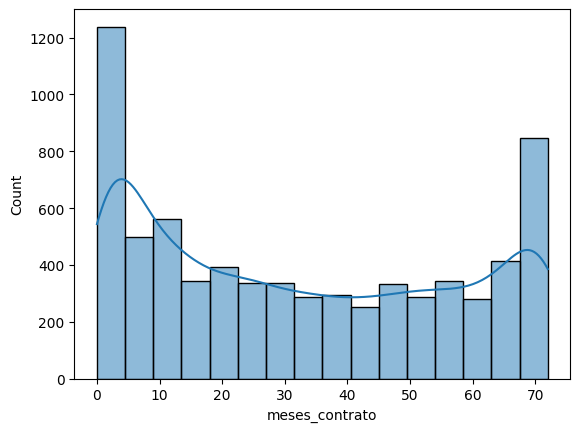

In [148]:
sns.histplot(data=datos, x='meses_contrato',kde=True)

Del grafico podemos decir que tenemos que incentivar los contrato a a largo plazo

###**Abandono versus Servicio telefónico**

In [149]:
datos.groupby('suscripcion_telefono')['evasion_empresa'].value_counts()

suscripcion_telefono  evasion_empresa
0                     0                   512
                      1                   170
1                     0                  4662
                      1                  1699
Name: count, dtype: int64

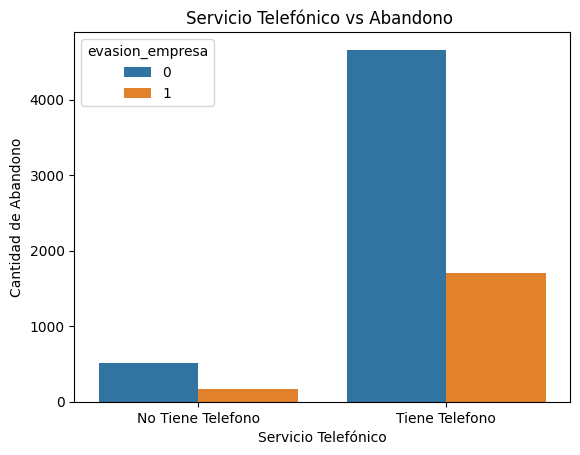

In [150]:
sns.countplot(x='suscripcion_telefono', data=datos,hue='evasion_empresa')
plt.title('Servicio Telefónico vs Abandono ')
plt.xlabel('Servicio Telefónico')
plt.xticks([0,1],['No Tiene Telefono','Tiene Telefono'])
plt.ylabel('Cantidad de Abandono')
plt.show()

El abandono en clientes con servicio telefónico es alto. Se tendría que ver la calidad del servicio para bajar el abandono.

###**Abandono si tiene multiples líneas**

In [151]:
datos.groupby('multiples_lineas')['evasion_empresa'].value_counts()


multiples_lineas  evasion_empresa
0                 0                  3053
                  1                  1019
1                 0                  2121
                  1                   850
Name: count, dtype: int64

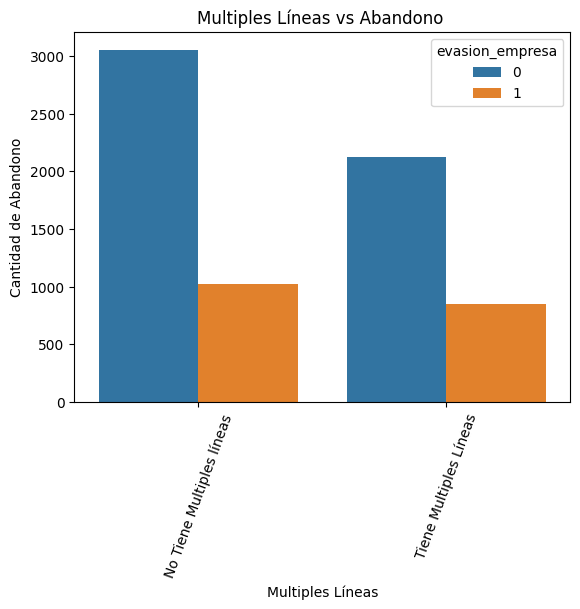

In [152]:
sns.countplot(x='multiples_lineas', data=datos,hue='evasion_empresa')
plt.title('Multiples Líneas vs Abandono ')
plt.xlabel('Multiples Líneas')
plt.xticks([0,1],['No Tiene Multiples líneas','Tiene Multiples Líneas'],rotation=70)

plt.ylabel('Cantidad de Abandono')
plt.show()

###**Abandono si tiene Seguridad OnLine**

In [153]:
datos.groupby('seguridad_online')['evasion_empresa'].value_counts()


seguridad_online  evasion_empresa
0                 0                  3450
                  1                  1574
1                 0                  1724
                  1                   295
Name: count, dtype: int64

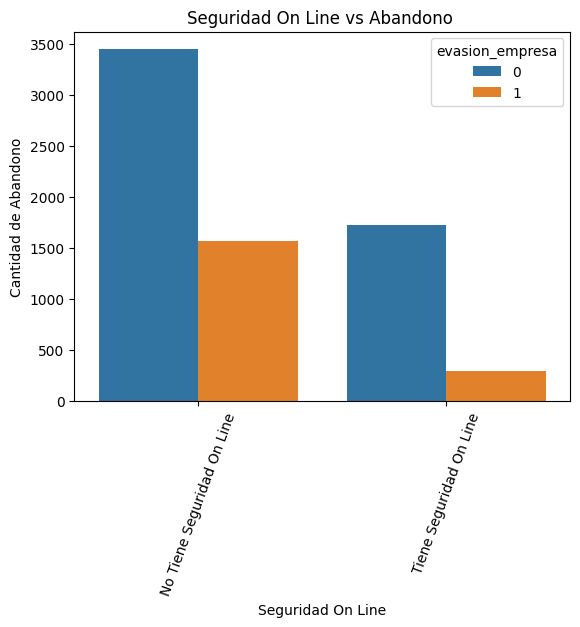

In [154]:
sns.countplot(x='seguridad_online', data=datos,hue='evasion_empresa')
plt.title('Seguridad On Line vs Abandono ')
plt.xlabel('Seguridad On Line')
plt.xticks([0,1],['No Tiene Seguridad On Line','Tiene Seguridad On Line'],rotation=70)

plt.ylabel('Cantidad de Abandono')
plt.show()

El abandono es bajo respecto a la seguridad On Line

###**Abandono si tiene Respaldo en Línea**

In [155]:
datos.groupby('respaldo_online')['evasion_empresa'].value_counts(normalize=True)


respaldo_online  evasion_empresa
0                0                  0.708279
                 1                  0.291721
1                0                  0.784685
                 1                  0.215315
Name: proportion, dtype: float64

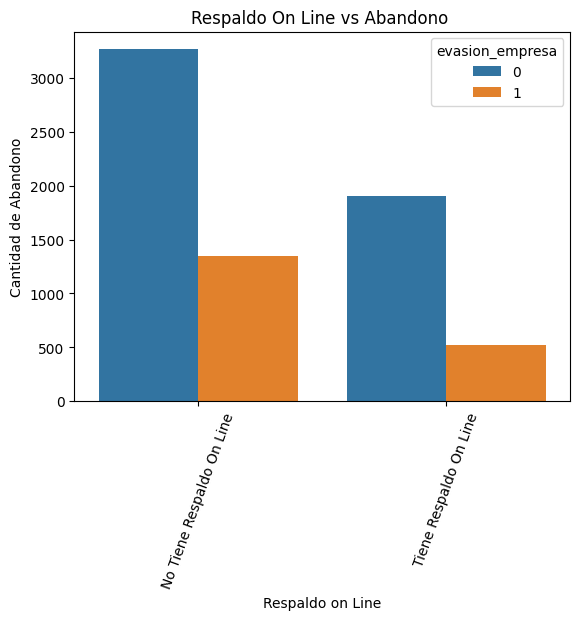

In [156]:
sns.countplot(x='respaldo_online', data=datos,hue='evasion_empresa')
plt.title('Respaldo On Line vs Abandono ')
plt.xlabel('Respaldo on Line')
plt.xticks([0,1],['No Tiene Respaldo On Line','Tiene Respaldo On Line'],rotation=70)

plt.ylabel('Cantidad de Abandono')
plt.show()

Los clientes que abandonan y que tiene respaldo On Line es de 21.5% con respecto a los clientes que se quedan y tienen respado on line

###**Abandono si tiene Protección de Dispositivos**

In [157]:
datos.groupby('seguridad_dispositivo')['evasion_empresa'].value_counts(normalize=True)


seguridad_dispositivo  evasion_empresa
0                      0                  0.713482
                       1                  0.286518
1                      0                  0.774979
                       1                  0.225021
Name: proportion, dtype: float64

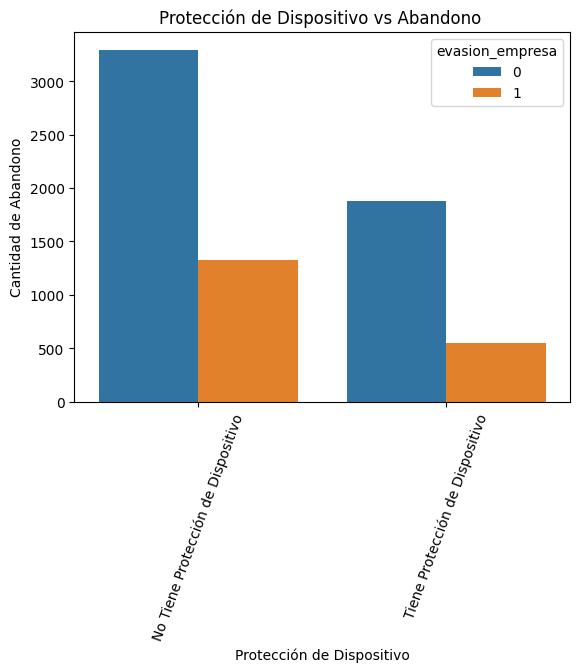

In [158]:
sns.countplot(x='seguridad_dispositivo', data=datos,hue='evasion_empresa')
plt.title('Protección de Dispositivo vs Abandono ')
plt.xlabel('Protección de Dispositivo')
plt.xticks([0,1],['No Tiene Protección de Dispositivo','Tiene Protección de Dispositivo'],rotation=70)

plt.ylabel('Cantidad de Abandono')
plt.show()

El abandono de los clientes que tienen Protección de dispositivos es de 22.5%

###**Abandono por Soporte Técnico**

In [159]:
datos.groupby('soporte_tecnico')['evasion_empresa'].value_counts(normalize=True)


soporte_tecnico  evasion_empresa
0                0                  0.688138
                 1                  0.311862
1                0                  0.848337
                 1                  0.151663
Name: proportion, dtype: float64

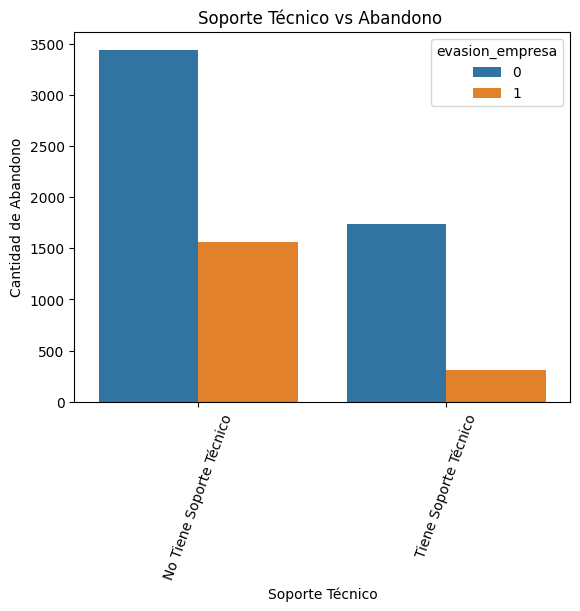

In [160]:
sns.countplot(x='soporte_tecnico', data=datos,hue='evasion_empresa')
plt.title('Soporte Técnico vs Abandono ')
plt.xlabel('Soporte Técnico')
plt.xticks([0,1],['No Tiene Soporte Técnico','Tiene Soporte Técnico'],rotation=70)

plt.ylabel('Cantidad de Abandono')
plt.show()

###**Abandono por StreamingTV**

In [161]:
datos.groupby('suscripcion_TV')['evasion_empresa'].value_counts(normalize=True)


suscripcion_TV  evasion_empresa
0               0                  0.756688
                1                  0.243312
1               0                  0.699298
                1                  0.300702
Name: proportion, dtype: float64

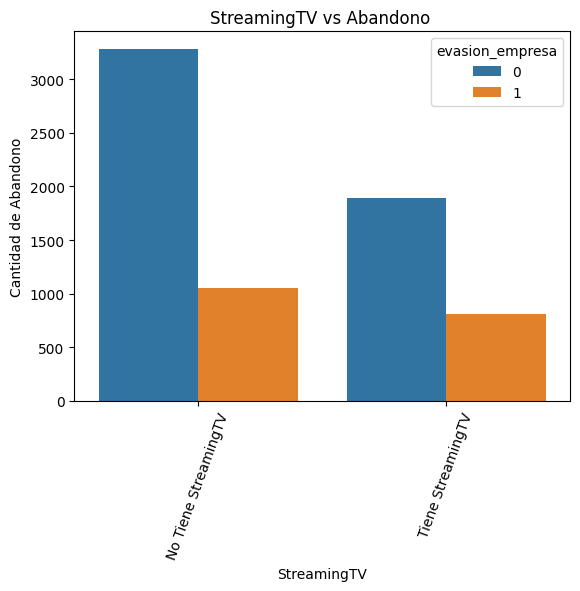

In [162]:
sns.countplot(x='suscripcion_TV', data=datos,hue='evasion_empresa')
plt.title('StreamingTV vs Abandono ')
plt.xlabel('StreamingTV')
plt.xticks([0,1],['No Tiene StreamingTV','Tiene StreamingTV'],rotation=70)

plt.ylabel('Cantidad de Abandono')
plt.show()

El abandono por StreamingTV es del 30%,

###**Abandono por StreamingMovies**

In [163]:
datos.groupby('suscripcion_peliculas')['evasion_empresa'].value_counts(normalize=True)

suscripcion_peliculas  evasion_empresa
0                      0                  0.756205
                       1                  0.243795
1                      0                  0.700586
                       1                  0.299414
Name: proportion, dtype: float64

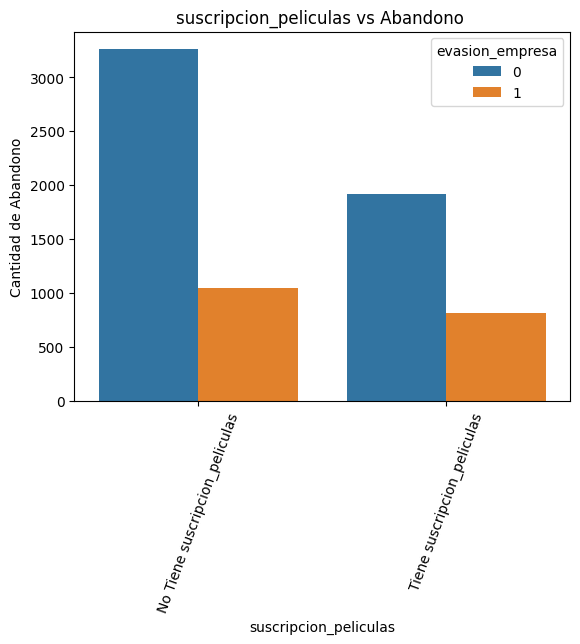

In [164]:
sns.countplot(x='suscripcion_peliculas', data=datos,hue='evasion_empresa')
plt.title('suscripcion_peliculas vs Abandono ')
plt.xlabel('suscripcion_peliculas')
plt.xticks([0,1],['No Tiene suscripcion_peliculas','Tiene suscripcion_peliculas'],rotation=70)

plt.ylabel('Cantidad de Abandono')
plt.show()

El Abandono por StreamingMovies es del 30%

###**Abandono por Cargos Mensuales**

<Axes: xlabel='cuenta_mensual', ylabel='Count'>

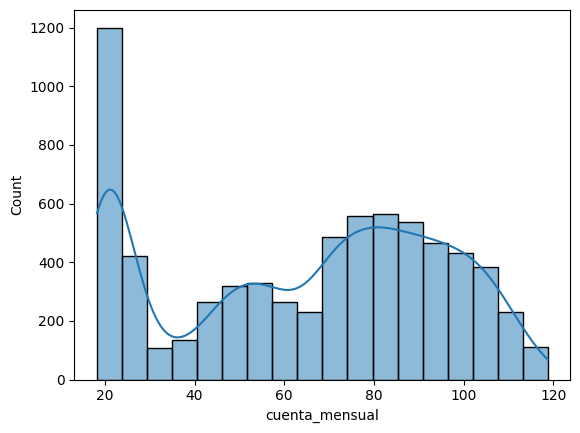

In [165]:
sns.histplot(data=datos, x='cuenta_mensual',kde=True)

###**Abandono por cargos Totales**

In [166]:
datos['Total'].unique()

array([ 593.3 ,  542.4 ,  280.85, ...,  742.9 , 4627.65, 3707.6 ])

<Axes: xlabel='Total', ylabel='Count'>

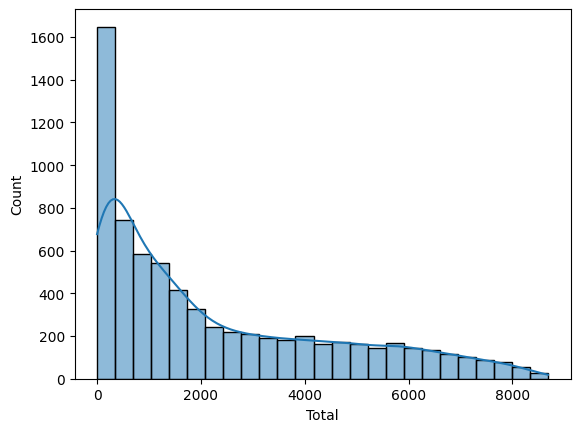

In [167]:
sns.histplot(data=datos, x='Total',kde=True)

In [168]:
datos_evasion = datos[datos['evasion_empresa'] == 1]
datos_evasion

,evasion_empresa,sexo,mayor_65,pareja,dependientes,meses_contrato,suscripcion_telefono,multiples_lineas,proveedor_internet,seguridad_online,...,seguridad_dispositivo,soporte_tecnico,suscripcion_TV,suscripcion_peliculas,tipo_contrato,factura_online,forma_pago,cuenta_mensual,Total,cuenta_diaria
2,1,Male,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,1,Male,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,1,Female,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
18,1,Male,1,0,0,45,1,0,DSL,1,...,1,0,0,1,One year,0,Credit card (automatic),62.70,2791.50,2.090000
19,1,Male,1,0,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,25.10,25.10,0.836667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7020,1,Male,1,0,0,21,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Bank transfer (automatic),96.80,2030.30,3.226667
7023,1,Male,1,0,0,9,1,1,Fiber optic,0,...,0,0,0,1,Month-to-month,1,Electronic check,83.85,790.15,2.795000
7036,1,Female,0,0,0,1,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Mailed check,70.15,70.15,2.338333
7037,1,Female,0,0,0,4,1,0,No,0,...,0,0,0,0,Month-to-month,0,Bank transfer (automatic),20.95,85.50,0.698333


##**Codificación las variables que no se pudieron transformar en 1 ó 0**

In [169]:
# creación de una lista con las variables  categoricas
categoricas =['sexo','proveedor_internet','tipo_contrato','forma_pago']

In [170]:
datos_codificados = pd.get_dummies(data=datos,columns=categoricas,dtype=int)

In [171]:
datos_codificados.sample(8)

,evasion_empresa,mayor_65,pareja,dependientes,meses_contrato,suscripcion_telefono,multiples_lineas,seguridad_online,respaldo_online,seguridad_dispositivo,...,proveedor_internet_DSL,proveedor_internet_Fiber optic,proveedor_internet_No,tipo_contrato_Month-to-month,tipo_contrato_One year,tipo_contrato_Two year,forma_pago_Bank transfer (automatic),forma_pago_Credit card (automatic),forma_pago_Electronic check,forma_pago_Mailed check
1378,0,0,0,0,31,1,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3336,1,1,0,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4340,0,0,1,1,70,1,1,1,1,1,...,1,0,0,0,0,1,0,1,0,0
5295,1,0,0,0,7,1,1,0,0,1,...,0,1,0,1,0,0,0,1,0,0
792,0,0,0,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
424,0,0,1,0,56,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1239,0,0,0,0,70,0,0,1,0,1,...,1,0,0,0,0,1,1,0,0,0
4030,0,0,1,1,72,1,1,1,1,0,...,0,1,0,0,0,1,1,0,0,0


In [172]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   evasion_empresa                       7043 non-null   int64  
 1   mayor_65                              7043 non-null   int64  
 2   pareja                                7043 non-null   int64  
 3   dependientes                          7043 non-null   int64  
 4   meses_contrato                        7043 non-null   int64  
 5   suscripcion_telefono                  7043 non-null   int64  
 6   multiples_lineas                      7043 non-null   int64  
 7   seguridad_online                      7043 non-null   int64  
 8   respaldo_online                       7043 non-null   int64  
 9   seguridad_dispositivo                 7043 non-null   int64  
 10  soporte_tecnico                       7043 non-null   int64  
 11  suscripcion_TV   

##**Distribución de la Frecuencia del Churn o Abandono**

In [173]:
datos['evasion_empresa'].value_counts(normalize=True)

,proportion
evasion_empresa,
0,0.73463
1,0.26537


Los datos están desbalanceados ya que los clientes que abandonan la empresa es de 26,53% con respecto a total de clientes (7043 clientes totales)

/tmp/ipython-input-271939272.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(datos['evasion_empresa'])


<Axes: title={'center': 'Distribuición de Frecuencias'}, xlabel='evasion_empresa', ylabel='Density'>

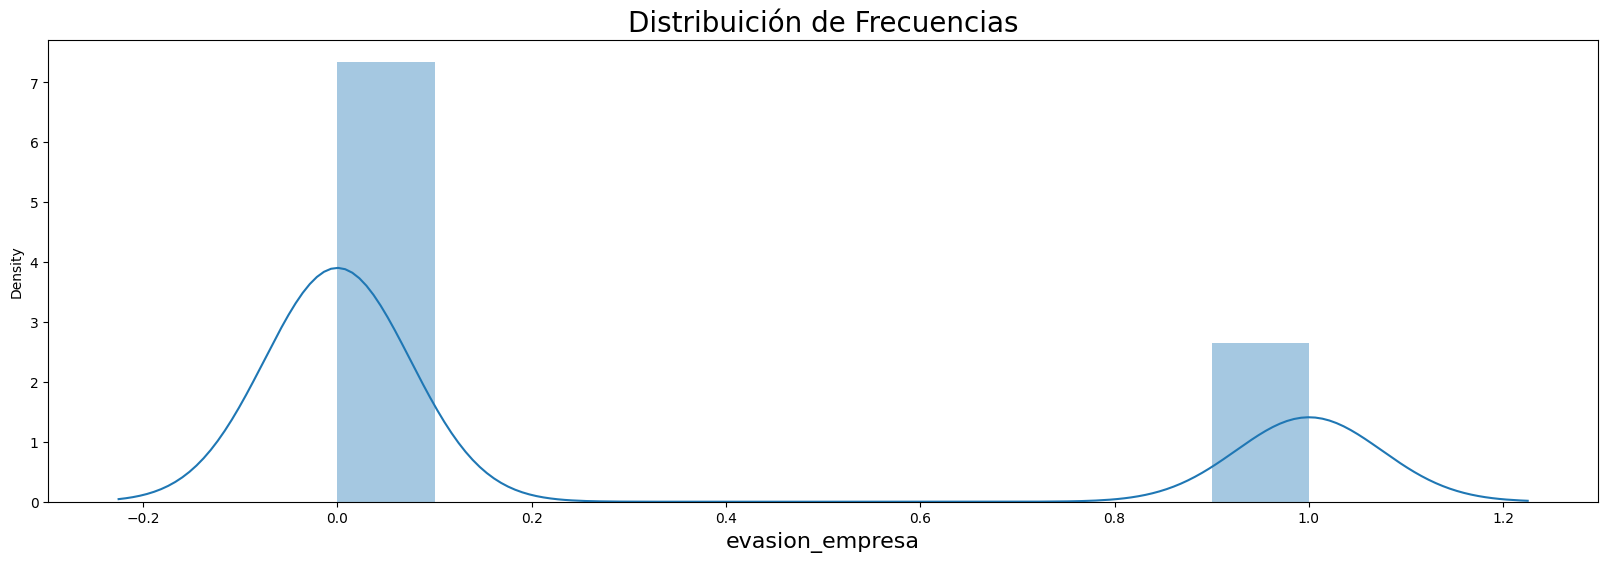

In [174]:
ax=sns.distplot(datos['evasion_empresa'])
ax.figure.set_size_inches(20, 6),
ax.set_title('Distribuición de Frecuencias', fontsize=20)
ax.set_xlabel('evasion_empresa', fontsize=16)
ax

<Axes: xlabel='evasion_empresa', ylabel='Count'>

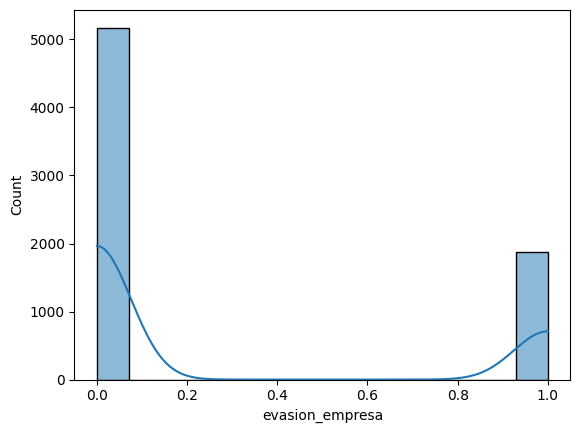

In [175]:
sns.histplot(data=datos, x='evasion_empresa',kde=True)

Elegiremos módelos que no son sensibles a las  escalas como Random Forest y Decision Tree. Por lo que no Normalizaremos los datos

##**Matriz de Correlación**

In [176]:
datos_codificados.corr().round(4)

,evasion_empresa,mayor_65,pareja,dependientes,meses_contrato,suscripcion_telefono,multiples_lineas,seguridad_online,respaldo_online,seguridad_dispositivo,...,proveedor_internet_DSL,proveedor_internet_Fiber optic,proveedor_internet_No,tipo_contrato_Month-to-month,tipo_contrato_One year,tipo_contrato_Two year,forma_pago_Bank transfer (automatic),forma_pago_Credit card (automatic),forma_pago_Electronic check,forma_pago_Mailed check
evasion_empresa,1.0000,0.1509,-0.1504,-0.1642,-0.3522,0.0119,0.0401,-0.1712,-0.0823,-0.0662,...,-0.1242,0.3080,-0.2279,0.4051,-0.1778,-0.3023,-0.1179,-0.1343,0.3019,-0.0917
mayor_65,0.1509,1.0000,0.0165,-0.2112,0.0166,0.0086,0.1429,-0.0387,0.0666,0.0594,...,-0.1083,0.2553,-0.1827,0.1384,-0.0463,-0.1170,-0.0162,-0.0241,0.1717,-0.1535
pareja,-0.1504,0.0165,1.0000,0.4527,0.3797,0.0177,0.1421,0.1431,0.1415,0.1538,...,-0.0009,0.0003,0.0006,-0.2809,0.0828,0.2481,0.1107,0.0820,-0.0839,-0.0951
dependientes,-0.1642,-0.2112,0.4527,1.0000,0.1597,-0.0018,-0.0245,0.0810,0.0237,0.0140,...,0.0520,-0.1658,0.1398,-0.2317,0.0684,0.2046,0.0520,0.0603,-0.1506,0.0591
meses_contrato,-0.3522,0.0166,0.3797,0.1597,1.0000,0.0084,0.3319,0.3272,0.3603,0.3607,...,0.0133,0.0197,-0.0391,-0.6456,0.2026,0.5585,0.2435,0.2330,-0.2084,-0.2339
suscripcion_telefono,0.0119,0.0086,0.0177,-0.0018,0.0084,1.0000,0.2797,-0.0929,-0.0523,-0.0712,...,-0.4524,0.2900,0.1722,-0.0007,-0.0028,0.0035,0.0076,-0.0077,0.0031,-0.0033
multiples_lineas,0.0401,0.1429,0.1421,-0.0245,0.3319,0.2797,1.0000,0.0981,0.2022,0.2011,...,-0.1999,0.3661,-0.2106,-0.0882,-0.0038,0.1063,0.0755,0.0600,0.0836,-0.2272
seguridad_online,-0.1712,-0.0387,0.1431,0.0810,0.3272,-0.0929,0.0981,1.0000,0.2838,0.2754,...,0.3213,-0.0307,-0.3334,-0.2467,0.1002,0.1918,0.0952,0.1157,-0.1123,-0.0808
respaldo_online,-0.0823,0.0666,0.1415,0.0237,0.3603,-0.0523,0.2022,0.2838,1.0000,0.3035,...,0.1579,0.1657,-0.3816,-0.1642,0.0837,0.1114,0.0870,0.0908,-0.0004,-0.1742
seguridad_dispositivo,-0.0662,0.0594,0.1538,0.0140,0.3607,-0.0712,0.2011,0.2754,0.3035,1.0000,...,0.1463,0.1760,-0.3808,-0.2257,0.1025,0.1651,0.0831,0.1116,-0.0034,-0.1874


In [177]:
# vamos a ordenar la primera columna
correlacion = datos_codificados.corr()['evasion_empresa'].sort_values(ascending=False).round(4)
correlacion

,evasion_empresa
evasion_empresa,1.0000
tipo_contrato_Month-to-month,0.4051
proveedor_internet_Fiber optic,0.3080
forma_pago_Electronic check,0.3019
cuenta_mensual,0.1934
cuenta_diaria,0.1934
factura_online,0.1918
mayor_65,0.1509
suscripcion_TV,0.0632
suscripcion_peliculas,0.0614


In [178]:
datos_codificados.columns

Index(['evasion_empresa', 'mayor_65', 'pareja', 'dependientes',
       'meses_contrato', 'suscripcion_telefono', 'multiples_lineas',
       'seguridad_online', 'respaldo_online', 'seguridad_dispositivo',
       'soporte_tecnico', 'suscripcion_TV', 'suscripcion_peliculas',
       'factura_online', 'cuenta_mensual', 'Total', 'cuenta_diaria',
       'sexo_Female', 'sexo_Male', 'proveedor_internet_DSL',
       'proveedor_internet_Fiber optic', 'proveedor_internet_No',
       'tipo_contrato_Month-to-month', 'tipo_contrato_One year',
       'tipo_contrato_Two year', 'forma_pago_Bank transfer (automatic)',
       'forma_pago_Credit card (automatic)', 'forma_pago_Electronic check',
       'forma_pago_Mailed check'],
      dtype='object')

Sí comparamos los datos correlacionados con el abandono por las variables, nos damos cuenta que no coinciden. Un ejemplo de ello es el streaming de Tv, la distribución del Churn por streaming Tv es de 30% y cuando vemos esta variable correlacionado con el abandono, nos indica que las variables no están relacionados ni directa (0.06) ni indirectamente.

In [179]:
from tabulate import tabulate


In [180]:
tabla = [['Variable','Correlación','Observaciones'],
    ['tipo_contrato_Month-to-month',0.4051,'El contrato mes a mes tiene una alta incidencia en el abandono. Menor permananencia mayor abandono'],
         ['proveedor_internet_Fiber optic',0.3080,'El servicio de Fibra óptica esta muy relacionado con el abandono , puede ser por fallas'],
         ['forma_pago_Electronic check',0.3019,'Pago electrónico alta tasa de abandono, mejorar la experiencia de pago o promocionar otras alternativas de pago'],
         ['cuenta_mensual',0.1934,'Los pagos mensuales influyen directamente en el abandono, ver promosiones u ofertas'],
         ['factura_online',0.1918,'Los clientes que reciben factura en línea tienen alto abandono, implementar servicio de correo en papel'],
         ['']]
formato_tabla = 'plain'
crear_tabla = tabulate(tabla, headers="firstrow", tablefmt=formato_tabla)
contenido_celda = f"Tabla de variables que explica el abandono de clientes:\n{crear_tabla}\n."
print(contenido_celda)


Tabla de variables que explica el abandono de clientes:
Variable                          Correlación  Observaciones
tipo_contrato_Month-to-month           0.4051  El contrato mes a mes tiene una alta incidencia en el abandono. Menor permananencia mayor abandono
proveedor_internet_Fiber optic         0.308   El servicio de Fibra óptica esta muy relacionado con el abandono , puede ser por fallas
forma_pago_Electronic check            0.3019  Pago electrónico alta tasa de abandono, mejorar la experiencia de pago o promocionar otras alternativas de pago
cuenta_mensual                         0.1934  Los pagos mensuales influyen directamente en el abandono, ver promosiones u ofertas
factura_online                         0.1918  Los clientes que reciben factura en línea tienen alto abandono, implementar servicio de correo en papel

.


##**Separación de las Variables X e y**

In [181]:
#Variable Independiente o explicativa
X = datos_codificados.drop('evasion_empresa',axis=1)

# Variable Dependiente o variable Objetivo
y = datos_codificados['evasion_empresa']

##**Separando los Datos en Entrenamiento y Test**

In [182]:
from sklearn.model_selection import train_test_split


In [183]:
X,X_test,y,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X,y,random_state=42,stratify=y)# el 25% de los datos de train son para validación

##**Balanceo de Datos con Smote**

Los datos no están muy desbalanceados por lo que no utizaremos está técnica

##**Modelo Decision Tree Classifier**

In [184]:
from sklearn.tree import DecisionTreeClassifier


In [185]:
modelo_DT = DecisionTreeClassifier(max_depth=10)
modelo_DT.fit(X_train,y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo_DT.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es de: {modelo_DT.score(X_val,y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es de: 0.8934271030565323
La exactitud del modelo con el conjunto de validación es de: 0.7656123276561233


###**Evaluando el Modelo**

####**Matriz de Confusion**

In [186]:
from sklearn.metrics import confusion_matrix

In [187]:
y_previsto = modelo_DT.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto) #compara los valores reales (val) con los previstos
print(matriz_confusion)

[[794 112]
 [177 150]]


In [188]:
from sklearn.metrics import ConfusionMatrixDisplay

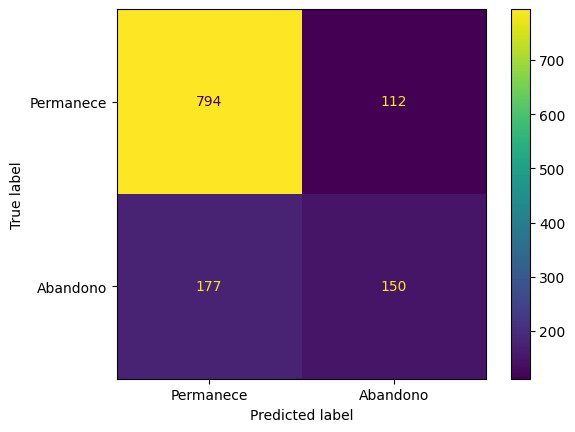

In [189]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion,display_labels=['Permanece','Abandono'])
visualizacion.plot();

El modelo Decission Tree Classifier evaluado con la matriz de confusion

La predicción  es que permanecen y el cliente realmente abandona es de 183

La prediicion es que abandona y el cliente realmente abandona es de 144

La prediccion es que permanece y el cliente realmente permanece es de 792

La prediccion es que abandona y el cliente realmente permanece es 114

####**Metricas de Evaluación**

In [190]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [191]:
print(f'La precision del modelo es :{precision_score(y_val,y_previsto)}')
print(f'La sensibilidad (recall) del modelo es :{recall_score(y_val,y_previsto)}')
print(f'La exactitud (accuracy) del modelo es :{accuracy_score(y_val,y_previsto)}')
print(f'El F1-score del modelo es :{f1_score(y_val,y_previsto)}')

La precision del modelo es :0.5725190839694656
La sensibilidad (recall) del modelo es :0.45871559633027525
La exactitud (accuracy) del modelo es :0.7656123276561233
El F1-score del modelo es :0.5093378607809848


#####**Curva ROC**

In [192]:
from sklearn.metrics import RocCurveDisplay

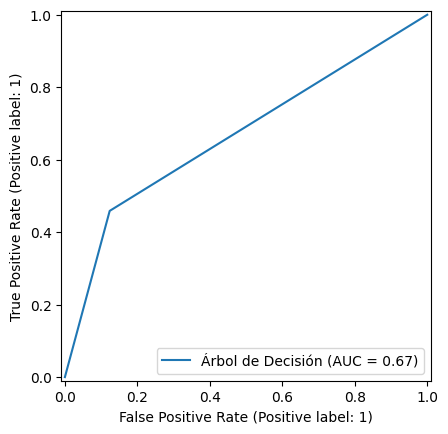

In [193]:
RocCurveDisplay.from_predictions(y_val,y_previsto,name='Árbol de Decisión');

In [194]:
from sklearn.metrics import roc_auc_score

In [195]:
print(f'El área bajo la curva ROC del modelo es: {roc_auc_score(y_val,y_previsto)}')

El área bajo la curva ROC del modelo es: 0.6675476436397513


#####**Curva de Precision por sensibilidad**

In [196]:
from sklearn.metrics import PrecisionRecallDisplay

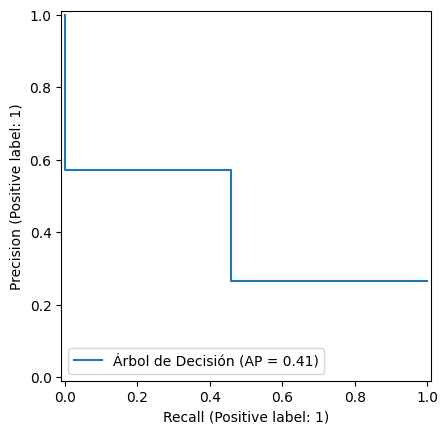

In [197]:
PrecisionRecallDisplay.from_predictions(y_val,y_previsto,name='Árbol de Decisión');

In [198]:
from sklearn.metrics import average_precision_score

In [199]:
print(f'El score promedio de precision vs recall es : {average_precision_score(y_val,y_previsto)}')

El score promedio de precision vs recall es : 0.4061757444490395


#####**Informe de Metricas**

In [200]:
from sklearn.metrics import classification_report

In [201]:
print(classification_report(y_val,y_previsto))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       906
           1       0.57      0.46      0.51       327

    accuracy                           0.77      1233
   macro avg       0.70      0.67      0.68      1233
weighted avg       0.75      0.77      0.76      1233



#####**Importancia de las Variables**

In [202]:
importancia = modelo_DT.feature_importances_
importancia

array([0.020466  , 0.00689001, 0.0138826 , 0.13311142, 0.0112182 ,
       0.00614315, 0.01466465, 0.01198287, 0.00907569, 0.01213648,
       0.00522152, 0.00085508, 0.01788694, 0.08692116, 0.14481261,
       0.07247255, 0.00609497, 0.01702166, 0.00397275, 0.0710434 ,
       0.01225607, 0.27121602, 0.00231471, 0.        , 0.00614099,
       0.01543704, 0.02412516, 0.0026363 ])

In [203]:
Variables_importantes = pd.DataFrame({'Variables': X.columns,'Importancia':(importancia*100).round(2)})
Variables_importantes.sort_values('Importancia',ascending=False)

,Variables,Importancia
21,tipo_contrato_Month-to-month,27.12
14,Total,14.48
3,meses_contrato,13.31
13,cuenta_mensual,8.69
15,cuenta_diaria,7.25
19,proveedor_internet_Fiber optic,7.10
26,forma_pago_Electronic check,2.41
0,mayor_65,2.05
12,factura_online,1.79
17,sexo_Male,1.70


###**Probando el modelo Decission Tree Classifier**

In [204]:

y_previsto_DT_test = modelo_DT.predict(X_test)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1552
           1       0.53      0.46      0.49       561

    accuracy                           0.75      2113
   macro avg       0.67      0.65      0.66      2113
weighted avg       0.74      0.75      0.74      2113



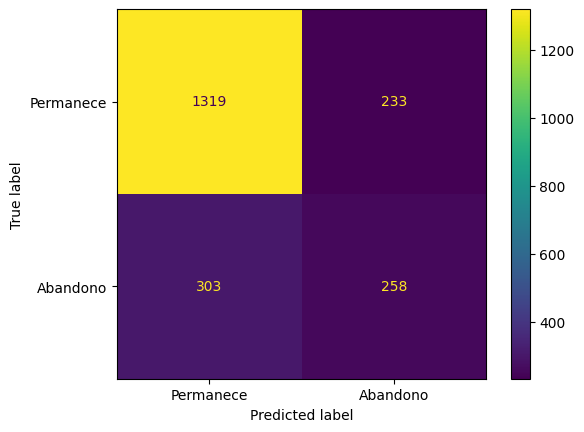

In [205]:
print(classification_report(y_test,y_previsto_DT_test))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto_DT_test,display_labels=['Permanece','Abandono']);

##**Modelo Random Forest**

In [206]:
from sklearn.ensemble import RandomForestClassifier

In [207]:
modelo_RF = RandomForestClassifier(max_depth=10)

In [208]:
modelo_RF.fit(X_train,y_train)
print(f'precision del modelo con el conjunto de entrenamiento: {modelo_RF.score(X_train,y_train)}')
print(f'precision del modelo con el conjunto de validación: {modelo_RF.score(X_val,y_val)}')

precision del modelo con el conjunto de entrenamiento: 0.9007303218826075
precision del modelo con el conjunto de validación: 0.7988645579886455


###**Evaluando El Modelo Random Forest**

####**Matriz de Confusión**

In [209]:
y_previsto = modelo_RF.predict(X_val)

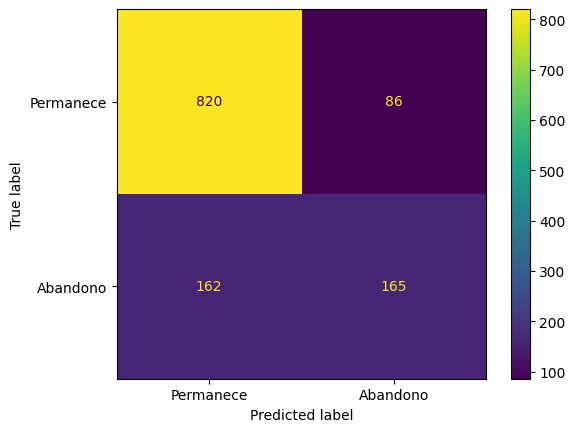

In [210]:
matriz_confusion = confusion_matrix(y_val,y_previsto)
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion,display_labels=['Permanece','Abandono'])
visualizacion.plot();

El modelo Random Forest Classifier evaluado con la matriz de confusion

La predicción  es que permanecen y el cliente realmente abandona es de 141

La prediccion es que abandona y el cliente realmente abandona es de 186

La prediccion es que permanece y el cliente realmente permanece es de 818

La prediccion es que abandona y el cliente realmente permanece es 88

####**Metricas de Evaluación**

In [211]:
print(f'La precision del modelo es :{precision_score(y_val,y_previsto)}')
print(f'La sensibilidad (recall) del modelo es :{recall_score(y_val,y_previsto)}')
print(f'La exactitud (accuracy) del modelo es :{accuracy_score(y_val,y_previsto)}')
print(f'El F1-score del modelo es :{f1_score(y_val,y_previsto)}')

La precision del modelo es :0.6573705179282868
La sensibilidad (recall) del modelo es :0.5045871559633027
La exactitud (accuracy) del modelo es :0.7988645579886455
El F1-score del modelo es :0.5709342560553633


#####**Curva ROC**

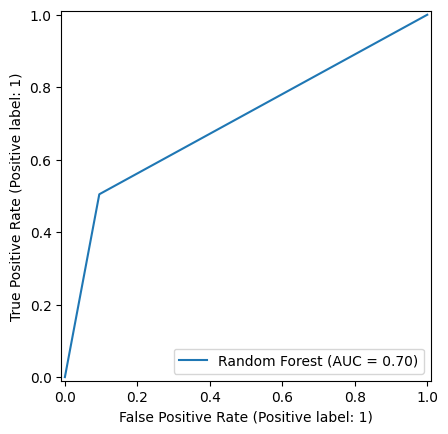

In [212]:
RocCurveDisplay.from_predictions(y_val,y_previsto,name='Random Forest');

In [213]:
print(f'El área bajo la curva ROC del modelo es: {roc_auc_score(y_val,y_previsto)}')

El área bajo la curva ROC del modelo es: 0.7048322093282297


#####**Curva de Precision por sensibilidad**

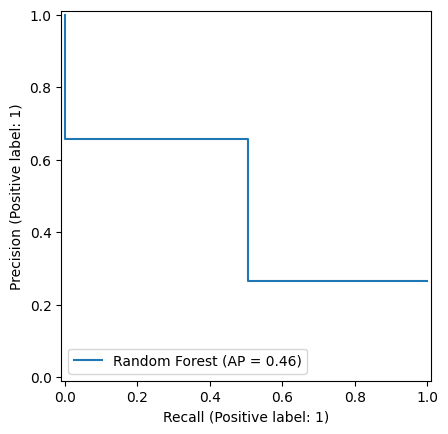

In [214]:
PrecisionRecallDisplay.from_predictions(y_val,y_previsto,name='Random Forest');

In [215]:
print(f'El score promedio de precision vs recall es : {average_precision_score(y_val,y_previsto)}')

El score promedio de precision vs recall es : 0.4630875813694262


#####**Informe de Métricas**

In [216]:
print(classification_report(y_val,y_previsto))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       906
           1       0.66      0.50      0.57       327

    accuracy                           0.80      1233
   macro avg       0.75      0.70      0.72      1233
weighted avg       0.79      0.80      0.79      1233



#####**Importancia de las Variables**

In [217]:
importancia = modelo_RF.feature_importances_
importancia

array([0.01464022, 0.013627  , 0.0148549 , 0.1442697 , 0.00678038,
       0.01235854, 0.02064819, 0.01394899, 0.01042535, 0.02579949,
       0.01171801, 0.01056257, 0.01938691, 0.10373977, 0.15241682,
       0.1082428 , 0.0119338 , 0.01187879, 0.01016529, 0.05667053,
       0.01559965, 0.08377666, 0.01707069, 0.03608106, 0.00873072,
       0.00859754, 0.04776704, 0.00830856])

In [218]:
Variables_importantes = pd.DataFrame({'Variables': X.columns,'Importancia':(importancia*100).round(2)})
Variables_importantes.sort_values('Importancia',ascending=False)

,Variables,Importancia
14,Total,15.24
3,meses_contrato,14.43
15,cuenta_diaria,10.82
13,cuenta_mensual,10.37
21,tipo_contrato_Month-to-month,8.38
19,proveedor_internet_Fiber optic,5.67
26,forma_pago_Electronic check,4.78
23,tipo_contrato_Two year,3.61
9,soporte_tecnico,2.58
6,seguridad_online,2.06


###**Probando el modelo Random Forest**

In [219]:
y_previsto_RF_test = modelo_RF.predict(X_test)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1552
           1       0.64      0.51      0.57       561

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.78      0.79      0.79      2113



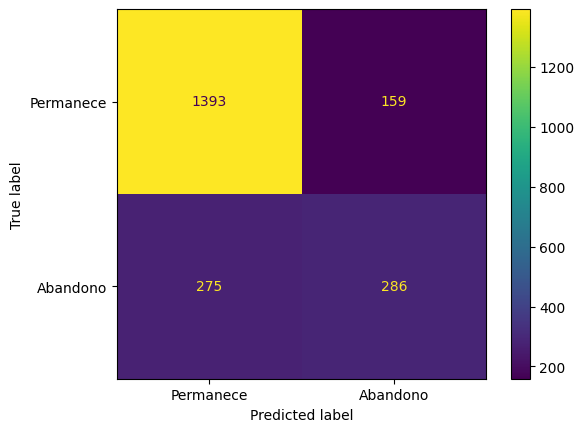

In [220]:
print(classification_report(y_test,y_previsto_RF_test))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto_RF_test,display_labels=['Permanece','Abandono']);

##**Informe Final**


Al hacer los análisis gráficos de la distribución de las variables y la correlación de datos concluimos que las variables que más inciden en el abandono son:

Varaibles que explican en Abandono de clientes

*   El contrato mes a mes es una de las principales variables que inciden en el abandono de clientes, ya que estos no tienen compromisos con la empresa, se ugiere una campaña de fidelización, proponiendo contratos a largo plazo, unido a  mejoras en los descuentos a medidaque aumenten los servicios y el tiempo de los contratos
*   Metodo de pago Electronic Check, es otra de las principales variables que explican el abandonode clientes, se sugiere una campaña de de pago por otros medios y ó  mejorar la experiencia de pago con este medio haciendola más simple de usar
*   Servicio de Internet por Fibra óptica, este servicio tiene una alta tasa de abandono, tal vez esto se explica con problemas técnicos en el servicio. Se recomienda mejorar la calidad del servicio.
*   Cargos mensuales altos, estos también inciden en el alto abandoni de clientes, se sugiere una política de descuentos fomentando la integración de servicios, a medida que el cliente cuente con más servicios, mayor descuento. Tambien pude crearse una plataforma comercial y técnica exclusiva para responder rapidamente a los clientes que varios servicios contratadoy y que paguen altas cifras mensuales.

Variables que ayudan a prevenir la probabilidad de abandono.


*   A mayor tiempo de contrato, mayor es la probabilidadde mantener al cliente en la empresa, por lo que tener una política de contratos a largo plazo es fundamental.
*   Tener contratos de soporte técnicoayuda a mantener a clientes cautivos, ya que mejora la experiencia de servicio.


*   Tener seguridad On Line ayuda a mantener al cliente debido a la experiencia de resguardar sus datos y bienes.
*   El pago automático a través de tarjeta de crédito o transferencia bancaria ayuda a mantener al cliente, se debeb incentivar el pago a través de estos medios

Modelos de Aprendizaje automático

La elección de los modelos de árbol en vez de los modelos de Regresión lineal se debe a que los primeros son menos sensibles a la escala de los datos, además que nuestra variable objetivo solo tenía 2 valores posibles, 0 o 1 , por lo cual ajustar una línea recta a los modelos de regresión lineal es imposible ya que no hay dispersión de los datos y no podriamos medir con las métricas de r2, MAE entre otros parámetros, ya que no podriamos medir la distancia de los datos a la recta. Así que en mi opinión los modelos de árbol se ajustan de mejor manera a este problema.
Se eligieron los modelos Decision Tree Classsifier y Random Forest. Al comparar los resultados con las metricas precision, recall,F1 score y accuracy, tanto con los datos de validación como con los datos de prueba pudimos observar que ambos modelos son consisten y no tienen una diferencia notable

Resultados del modelo Decision Tree Classifier con los datos de validación

                precision    recall  f1-score   support

           0       0.82      0.87      0.84       906
           1       0.56      0.46      0.50       327

    accuracy                           0.76      1233
   


Resultados del modelo Decision Tree Classifier con los datos de Prueba

                precision    recall  f1-score   support

           0       0.81      0.85      0.83      1552
           1       0.52      0.45      0.49       561

    accuracy                           0.74      2113
   

Como podemos observar en ambos cuadros, con el modelo Decision Tree Classifier los resultados con los datos de validación y con los datos de prueba son muy similares por lo que concluimos que el modelo está pronosticando bien los resultados y no se observa sobre o bajo ajuste


Resultados del modelo Random Forest con los datos de validación

                precision    recall  f1-score   support

           0       0.84      0.91      0.88       906
           1       0.69      0.53      0.60       327

    accuracy                           0.81      1233
   
Resultados del modelo Random Forest con los datos de prueba

                precision    recall  f1-score   support

           0       0.84      0.89      0.86      1552
           1       0.63      0.52      0.57       561

    accuracy                           0.79      2113
   

Al comparar los resultados del modelo Random Forest con los datos de validación y con los datos de prueba, podemos observar que no hay grandes diferencias en los datos previstos por lo que concluimos que nuestro modelo está pronosticando bien.

Al comparar ambos modelos elegidos, podemos concluir que Random Forest tiene mejores valores en las metricas precision, recall y F1 en predecir el abandono. En predecir que cliente se queda en la empresa ambos modelos son muy similares. Por lo cual el modelo elegido será Randon Forest











